# Análisis de ventas de tiendas con python

In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/MandrakeKFire/DataScienceFred_Alura/refs/heads/main/database_aluralatam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/MandrakeKFire/DataScienceFred_Alura/refs/heads/main/database_aluralatam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/MandrakeKFire/DataScienceFred_Alura/refs/heads/main/database_aluralatam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/MandrakeKFire/DataScienceFred_Alura/refs/heads/main/database_aluralatam/tienda_4.csv"

# Bases de datos obtenidas de:
# url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
# url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
# url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
# url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## Antes que nada, verificamos el estado de las tablas
Verificando que no existan celdas vacías, o que los datos correspondan al tipo de dato relacionado con la columna a la que pertenece.

In [ ]:
# Para ello, creamos pequeñas líneas de código exploratorio para verificar esto:

# Creamos data frames de cada una de las bases de datos de las tiendas:
dft1 = pd.DataFrame(tienda1)
dft2 = pd.DataFrame(tienda2)
dft3 = pd.DataFrame(tienda3)
dft4 = pd.DataFrame(tienda4)

# Imprimimos los datos para tener una breve descripción de los mismos:
print(f'{dft1.info()}\n')
print(f'{dft2.info()}\n')
print(f'{dft3.info()}\n')
print(f'{dft4.info()}\n')

# Con ello podemos observar si tenemos datos nulos, celdas vacías o cualquier otro error que requiera ajustes o limpieza.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data co

### Se calculará el **ingreso total de cada tienda**:

### Se sumarán los valores de la columna Precio de cada tienda para obtener los ingresos:

In [ ]:
# Primero creamos data frames para todas las tiendas:
dfs = [pd.DataFrame(t) for t in [tienda1, tienda2, tienda3, tienda4]]
tablastiendas = [f'Tienda {i+1}' for i in range(4)]

# Ahora obtenemos la suma de la columna precios:
for ingttl, df in zip(tablastiendas, dfs):
    vntls = df['Precio'].sum()
    print(f'Ingreso total de la {ingttl}: ${vntls:,.2f}\n')

Ingreso total de la Tienda 1: $1,150,880,400.00

Ingreso total de la Tienda 2: $1,116,343,500.00

Ingreso total de la Tienda 3: $1,098,019,600.00

Ingreso total de la Tienda 4: $1,038,375,700.00



### Posteriormente, se calculará la cantidad de **productos vendidos por categoría en cada tienda**.

### Esto con el fin de estratificar los datos para posteriormente obtener las ventas de cada tipo de objeto vendido por tienda y así obtener la(s) categoría(s) más popular(es) de cada tienda.

In [ ]:
# Comenzamos obteniendo los titulos de los encabezados de las columnas para obtener las categorías:
# Solo para constatar que se tienen las mismas columnas:
for prvnct, df in zip(tablastiendas, dfs):
    columnas = sorted(df.columns)
    print(f'Columnas de {prvnct}: {columnas}\n')

Columnas de Tienda 1: ['Calificación', 'Cantidad de cuotas', 'Categoría del Producto', 'Costo de envío', 'Fecha de Compra', 'Lugar de Compra', 'Método de pago', 'Precio', 'Producto', 'Vendedor', 'lat', 'lon']

Columnas de Tienda 2: ['Calificación', 'Cantidad de cuotas', 'Categoría del Producto', 'Costo de envío', 'Fecha de Compra', 'Lugar de Compra', 'Método de pago', 'Precio', 'Producto', 'Vendedor', 'lat', 'lon']

Columnas de Tienda 3: ['Calificación', 'Cantidad de cuotas', 'Categoría del Producto', 'Costo de envío', 'Fecha de Compra', 'Lugar de Compra', 'Método de pago', 'Precio', 'Producto', 'Vendedor', 'lat', 'lon']

Columnas de Tienda 4: ['Calificación', 'Cantidad de cuotas', 'Categoría del Producto', 'Costo de envío', 'Fecha de Compra', 'Lugar de Compra', 'Método de pago', 'Precio', 'Producto', 'Vendedor', 'lat', 'lon']



In [ ]:
# Después obtenemos las categorías únicas (sin datos nulos y ordenadas)
for ctgrdlprod, df in zip(tablastiendas, dfs):
    categorias = sorted([cat for cat in df['Categoría del Producto'].unique() if pd.notnull(cat)])
    print(f'Categorías de {ctgrdlprod}: {categorias}\n')

Categorías de Tienda 1: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']

Categorías de Tienda 2: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']

Categorías de Tienda 3: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']

Categorías de Tienda 4: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']



In [ ]:
# Ahora creamos la sintaxis de manera que cuente las columnas donde se repite cada una de las columnas y así obtener el número de ventas por categoría:
for vntspctgr, df in zip(tablastiendas, dfs):
    print(f'Ventas por categoría en {vntspctgr}:\n{df["Categoría del Producto"].value_counts()}\n')

Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Vent

### Se calcularán las **calificaciones promedio para cada tienda**

### De manera que se pueda saber la satisfacción del cliente:

In [ ]:
# Usamos el promedio para obtener la calificación promedio por tienda:
for clftnd, df in zip(tablastiendas, dfs):
    promclf = df['Calificación'].mean()
    print(f'Calificación promedio de {clftnd}: {promclf:,.2f} / 5.00 \n') # Agregamos un distintivo de " / 5.00" para mostrar que 5 es la calificación máxima.

Calificación promedio de Tienda 1: 3.98 / 5.00 

Calificación promedio de Tienda 2: 4.04 / 5.00 

Calificación promedio de Tienda 3: 4.05 / 5.00 

Calificación promedio de Tienda 4: 4.00 / 5.00 



### Ahora calcularemos los **productos más y menos vendidos por tienda**

### De manera que se visualicen los productos destacados

In [ ]:
# Obtendremos el número de productos más vendidos y menos vendidos por cada tienda:
for prdv, df in zip(tablastiendas, dfs):
    prdmsv=df['Producto'].value_counts().idxmax()
    prdmnv=df['Producto'].value_counts().idxmin()
    print(f'El producto más vendido de la Tienda {prdv} es: {prdmsv}')
    print(f'El producto menos vendido de la Tienda {prdv} es: {prdmnv}\n')

El producto más vendido de la Tienda Tienda 1 es: Microondas
El producto menos vendido de la Tienda Tienda 1 es: Auriculares con micrófono

El producto más vendido de la Tienda Tienda 2 es: Iniciando en programación
El producto menos vendido de la Tienda Tienda 2 es: Juego de mesa

El producto más vendido de la Tienda Tienda 3 es: Kit de bancas
El producto menos vendido de la Tienda Tienda 3 es: Bloques de construcción

El producto más vendido de la Tienda Tienda 4 es: Cama box
El producto menos vendido de la Tienda Tienda 4 es: Guitarra eléctrica



### Se calculará el **costo de envío promedio por cada tienda**.

### De esta manera comprenderemos el costo promedio por envío que cada cliente realiza.

In [ ]:
# Si nos enfocamos en todos los valores (incluyéndo envío gratuito), tenemos que:
print('El costo de envío promedio por cada tienda (incluyendo envío gratuito es:)\n')
for cstenvprmig, df in zip(tablastiendas, dfs):
    prdmsvig=df['Costo de envío'].mean()
    print(f'El costo de envío promedio de la Tienda {cstenvprmig} es: {prdmsvig:,.2f}\n')

# Tomándo en cuenta únicamente los valores superiores a $0 (Sin tomar en cuenta envíos gratuitos):
print('\nEl costo de envío promedio por cada tienda (sin incluir los envíos gratuitos es:)\n')
for cstenvprmsg, df in zip(tablastiendas, dfs):
    prdmsvsg = df.loc[df['Costo de envío'] > 0, 'Costo de envío'].mean()
    print(f'El costo de envío promedio de la Tienda {cstenvprmsg} es: {prdmsvsg:,.2f}\n')

El costo de envío promedio por cada tienda (incluyendo envío gratuito es:)

El costo de envío promedio de la Tienda Tienda 1 es: 26,018.61

El costo de envío promedio de la Tienda Tienda 2 es: 25,216.24

El costo de envío promedio de la Tienda Tienda 3 es: 24,805.68

El costo de envío promedio de la Tienda Tienda 4 es: 23,459.46


El costo de envío promedio por cada tienda (sin incluir los envíos gratuitos es:)

El costo de envío promedio de la Tienda Tienda 1 es: 28,547.86

El costo de envío promedio de la Tienda Tienda 2 es: 27,731.98

El costo de envío promedio de la Tienda Tienda 3 es: 27,204.37

El costo de envío promedio de la Tienda Tienda 4 es: 25,586.22



Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

No es necesario mostrar una visualización en cada paso, pero al final del análisis debes generar los gráficos que consideres más útiles para interpretar los datos.

Consejo: Matplotlib ofrece una variedad de tipos de gráficos que son fáciles de implementar, lo que lo convierte en una excelente opción para principiantes. Utilice su creatividad para elegir los gráficos que mejor resalten las tendencias y los conocimientos de su análisis.

# Creación de gráficos para análisis de datos de tiendas
Ahora utilizaremos librerías como Matplotlib para crear visualizaciones de los gráficos de algunos de los datos que necesitemos para comprender y comparar las tiendas y la diferencia entre ellas.

## Crearemos un gráfico para visualizar las ventas totales en cada tienda:

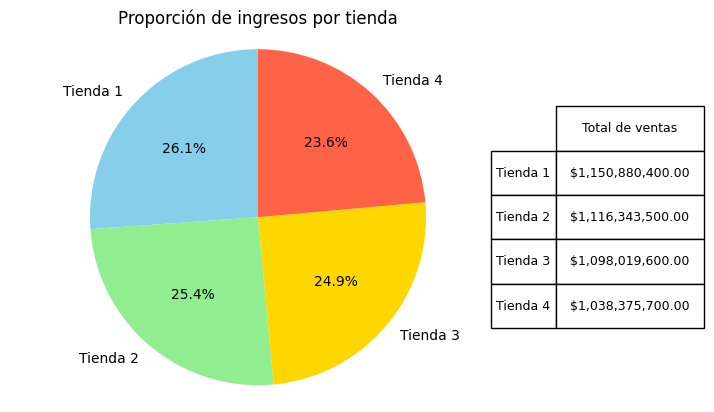

In [ ]:
# Primero importamos la librería
import matplotlib.pyplot as plt

# Creamos una pequeña lista para ingresar el total de ventas por tienda:
vntds = [dft1['Precio'].sum(),dft2['Precio'].sum(),dft3['Precio'].sum(),dft4['Precio'].sum()]
colores_tiendas = ['skyblue', 'lightgreen', 'gold', 'tomato'] # Personalizamos los colores para los gráficos

# Agregamos una pequeña tabla a un lado del gráfico para que se nos muestre las tiendas y sus ventas totales:
tabla_data = [[f"${total:,.2f}"] for total in vntds]
tabla = plt.table(
    cellText=tabla_data,
    rowLabels=tablastiendas,
    colLabels=["Total de ventas"],
    cellLoc='right',
    rowLoc='center',
    colLoc='center',
    loc='right',
    bbox=[1.1, 0.2, 0.3, 0.6]
)

# Crearemos un gráfico para visualizar la diferencia en el total de ventas de cada una de las tiendas
# Para ello, utilizaremos un gráfico de pastel:
plt.pie(vntds,
        labels=tablastiendas,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores_tiendas)
plt.title('Proporción de ingresos por tienda')
plt.axis('equal')
plt.show()

## Crearemos un gráfico para visualizar las ventas por categoría en cada tienda:

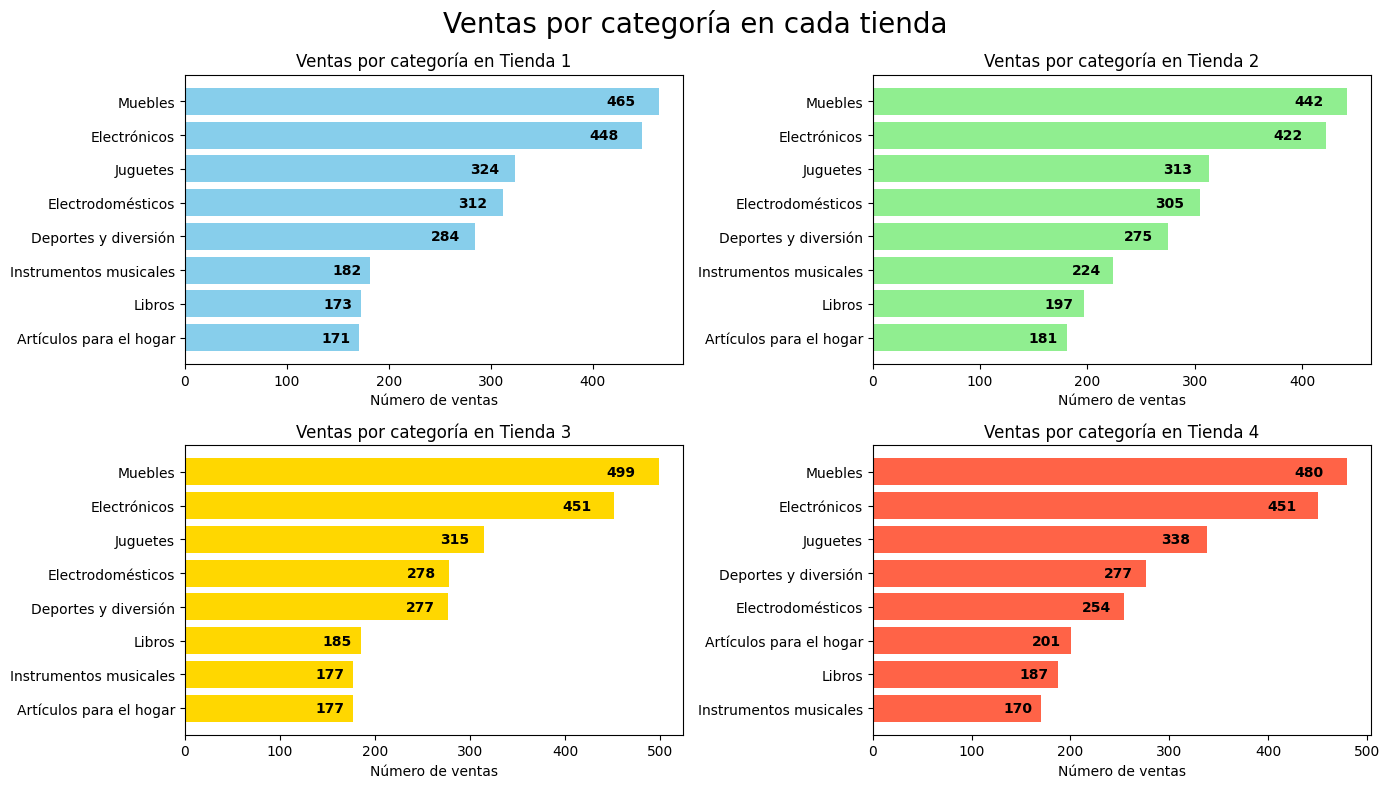

In [ ]:
fig, axs_pct_bar = plt.subplots(2, 2, figsize=(14, 8))  # 4 subplots en cuadrícula 2x2
fig.suptitle('Ventas por categoría en cada tienda', fontsize=20)
axs_pct_bar = axs_pct_bar.ravel()  # Convierte a lista plana para fácil acceso
for pct_bar, (nombre, df) in enumerate(zip(tablastiendas, dfs)):
    vntspctgr_gr = df['Categoría del Producto'].value_counts()
    axs_pct_bar[pct_bar].barh(vntspctgr_gr.index, vntspctgr_gr.values, color=colores_tiendas[pct_bar])
    axs_pct_bar[pct_bar].set_title(f'Ventas por categoría en {nombre}')
#    axs_pct_bar[pct_bar].set_ylabel('Categoría') # (Descomentar si se quiere agregar el título del eje "y")
    axs_pct_bar[pct_bar].set_xlabel('Número de ventas')
    axs_pct_bar[pct_bar].invert_yaxis()  # Esta línea de código es para mostrar las barras en orden descendente (de mayor a menor):

# Si queremos visualizar el número de ventas en cada barra:
    for i, (categoria, vntstotls_tnd) in enumerate(zip(vntspctgr_gr.index, vntspctgr_gr.values)):
        axs_pct_bar[pct_bar].text(vntstotls_tnd - (vntstotls_tnd*0.05), categoria, str(vntstotls_tnd),
                      va='center', ha='right', color='black', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()


## Crearemos un gráfico para mostrar los cinco productos más vendidos:

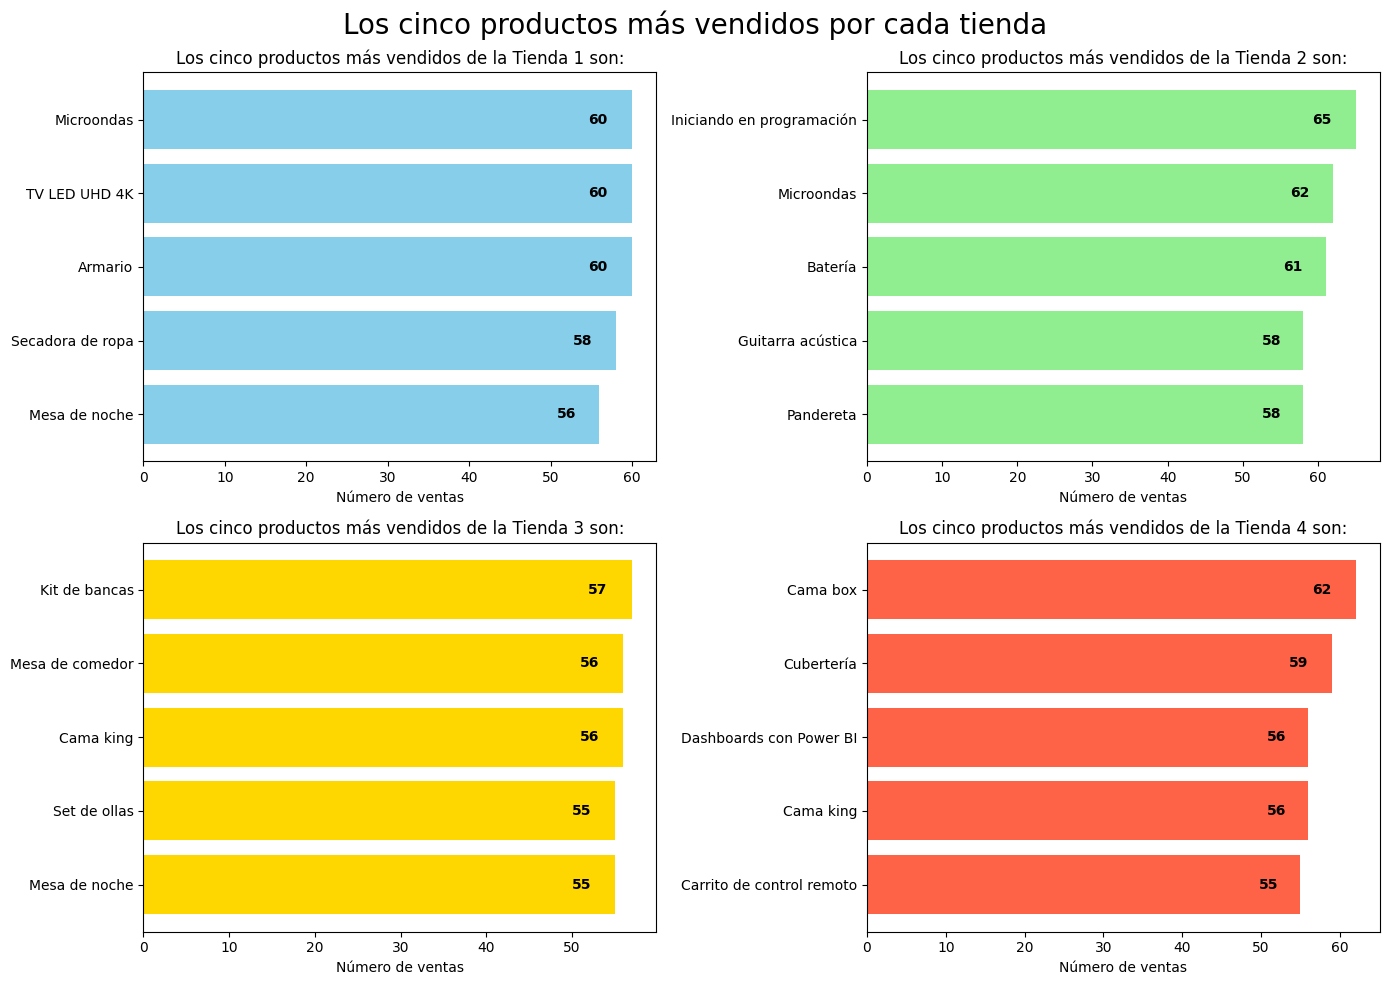

In [ ]:
fig, grf_br_top5 = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Los cinco productos más vendidos por cada tienda', fontsize=20)
grf_br_top5_lnl = grf_br_top5.ravel()

for brtp5, (nombre, df) in enumerate(zip(tablastiendas, dfs)):
    # Determinando los (cinco) productos más vendidos de las tiendas:
    top5 = df['Producto'].value_counts().head(5)
    grf_br_top5_lnl[brtp5].barh(top5.index[::-1], top5.values[::-1], color=colores_tiendas[brtp5])
    grf_br_top5_lnl[brtp5].set_title(f'Los cinco productos más vendidos de la {nombre} son:')
    grf_br_top5_lnl[brtp5].set_xlabel('Número de ventas')
#    grf_br_top5_lnl[brtp5].set_ylabel('Producto') # (Descomentar si se quiere agregar el título del eje "y")

    # Agregar etiquetas de valor al inicio de cada barra
    for i, (categoria, top5_ptnd) in enumerate(zip(top5.index, top5.values)):
        grf_br_top5_lnl[brtp5].text(top5_ptnd - (top5_ptnd*0.05), categoria, str(top5_ptnd),
                      va='center', ha='right', color='black', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## Crearemos un gráfico para mostrar los cinco productos menos vendidos:

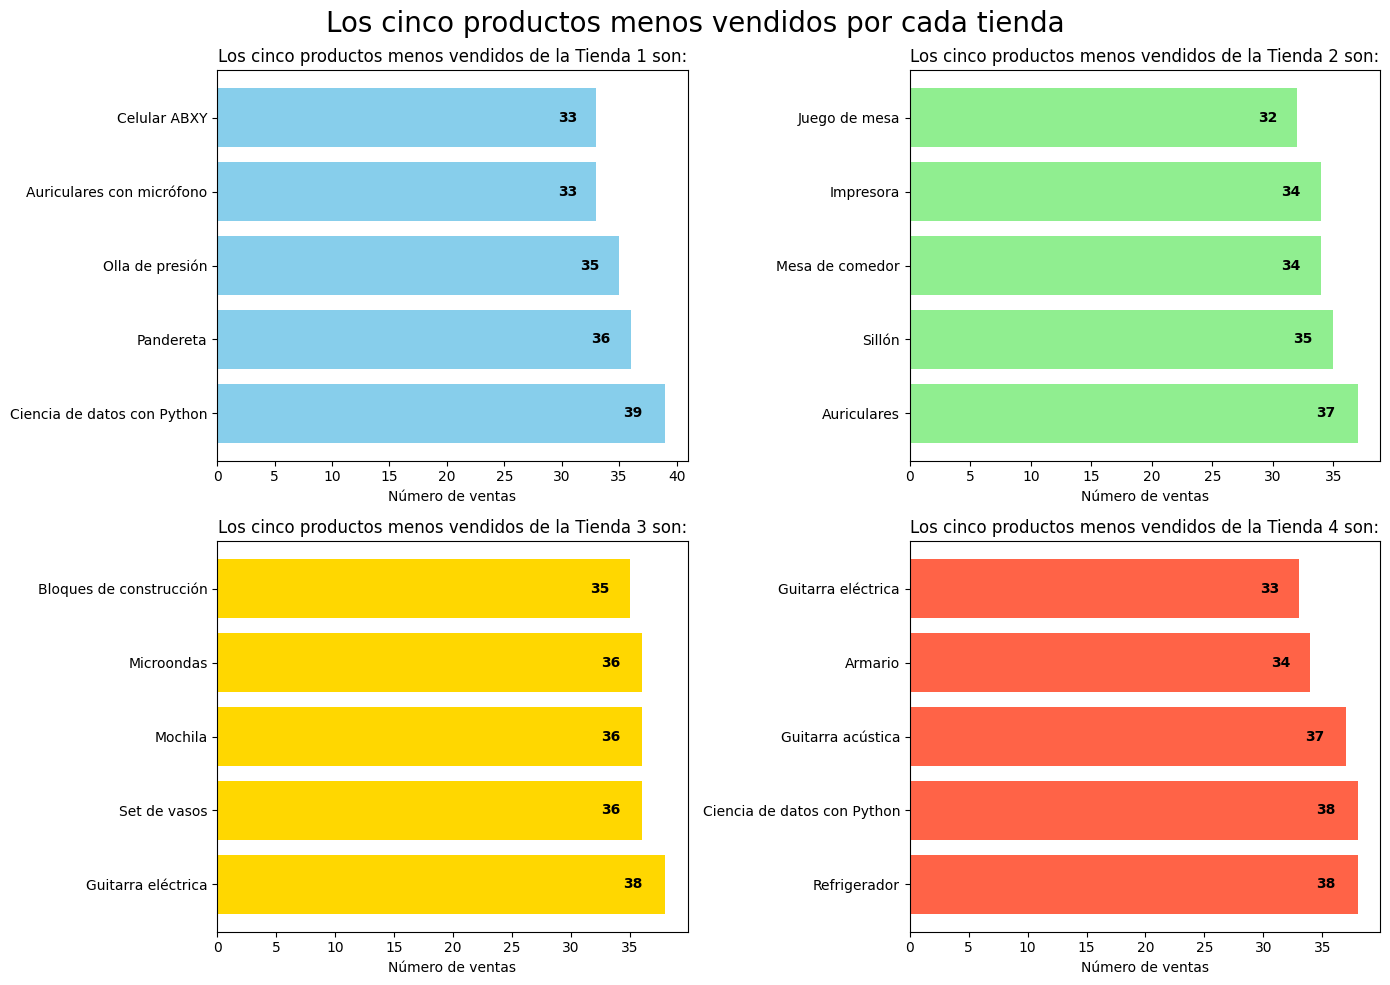

In [ ]:
fig, grf_br_dwn5 = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Los cinco productos menos vendidos por cada tienda', fontsize=20)
grf_br_dwn5_lnl = grf_br_dwn5.ravel()

for brtdwn5, (nombre, df) in enumerate(zip(tablastiendas, dfs)):
    # Los cinco productos menos vendidos por cada tienda:
    dwn = df['Producto'].value_counts().tail(5)
    grf_br_dwn5_lnl[brtdwn5].barh(dwn.index[::-1], dwn.values[::-1], color=colores_tiendas[brtdwn5])
    grf_br_dwn5_lnl[brtdwn5].set_title(f'Los cinco productos menos vendidos de la {nombre} son:')
    grf_br_dwn5_lnl[brtdwn5].set_xlabel('Número de ventas')
    grf_br_dwn5_lnl[brtdwn5].invert_yaxis() # Esta línea de código es para mostrar las barras en orden ascendente (de menor a mayor):
#    grf_br_dwn5_lnl[brtdwn5].set_ylabel('Producto') # (Descomentar si se quiere visualizar el título del eje "y")

    # Agregar etiquetas de valor al inicio de cada barra
    for i, (categoria, dwn5_ptnd) in enumerate(zip(dwn.index, dwn.values)):
        grf_br_dwn5_lnl[brtdwn5].text(dwn5_ptnd - (dwn5_ptnd*0.05), categoria, str(dwn5_ptnd),
                      va='center', ha='right', color='black', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## Crearemos un gráfico para conocer las calificaciones por tienda

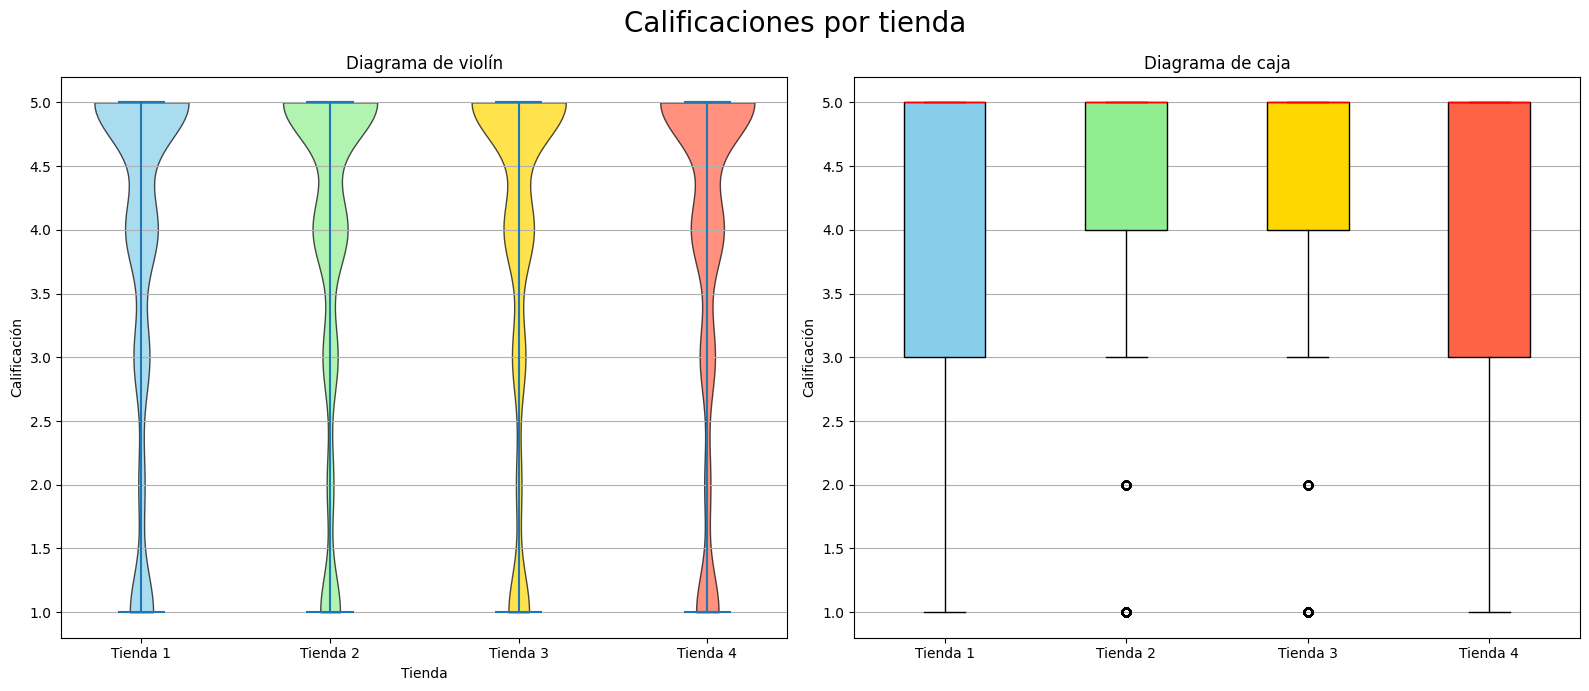

In [ ]:
# Agregamos columa de Tienda a nuestros Data Frames y concatenamos:
dft1['Tienda'] = 'Tienda 1'
dft2['Tienda'] = 'Tienda 2'
dft3['Tienda'] = 'Tienda 3'
dft4['Tienda'] = 'Tienda 4'

dfttnd = pd.concat([dft1, dft2, dft3, dft4], ignore_index=True)

# Organizamos los datos para realizar gráficos de violín y diagrámas de cajas
dtbxvl = [dfttnd.loc[dfttnd['Tienda'] == tienda, 'Calificación'] for tienda in dfttnd['Tienda'].unique()]
fig, dvclptnd = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Calificaciones por tienda', fontsize=20)

# Diagrama de violín
vpcltnd = dvclptnd[0].violinplot(dtbxvl, showmedians=True, showmeans=False, showextrema=True)
for i, pc in enumerate(vpcltnd['bodies']):
    pc.set_facecolor(colores_tiendas[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)
dvclptnd[0].set_title('Diagrama de violín')
dvclptnd[0].set_xlabel('Tienda')
dvclptnd[0].set_ylabel('Calificación')
dvclptnd[0].set_xticks([1,2,3,4])
dvclptnd[0].set_xticklabels(dfttnd['Tienda'].unique())
dvclptnd[0].grid(axis='y')

# Diagrama de caja
bpcltnd = dvclptnd[1].boxplot(dtbxvl, patch_artist=True, showfliers=True, medianprops=dict(color='red'))
for patch, color in zip(bpcltnd['boxes'], colores_tiendas):
    patch.set_facecolor(color)
dvclptnd[1].set_title('Diagrama de caja')
# dvclptnd[1].set_xlabel('Tienda') # Descomentar si queremos tener la etiqueta "Tienda"
dvclptnd[1].set_ylabel('Calificación')
dvclptnd[1].set_xticks([1,2,3,4])
dvclptnd[1].set_xticklabels(dfttnd['Tienda'].unique())
dvclptnd[1].grid(axis='y')

plt.tight_layout()
plt.show()

## Crearemos gráficos de área para segmentar las cantidades de ingresos por tienda mensualmente

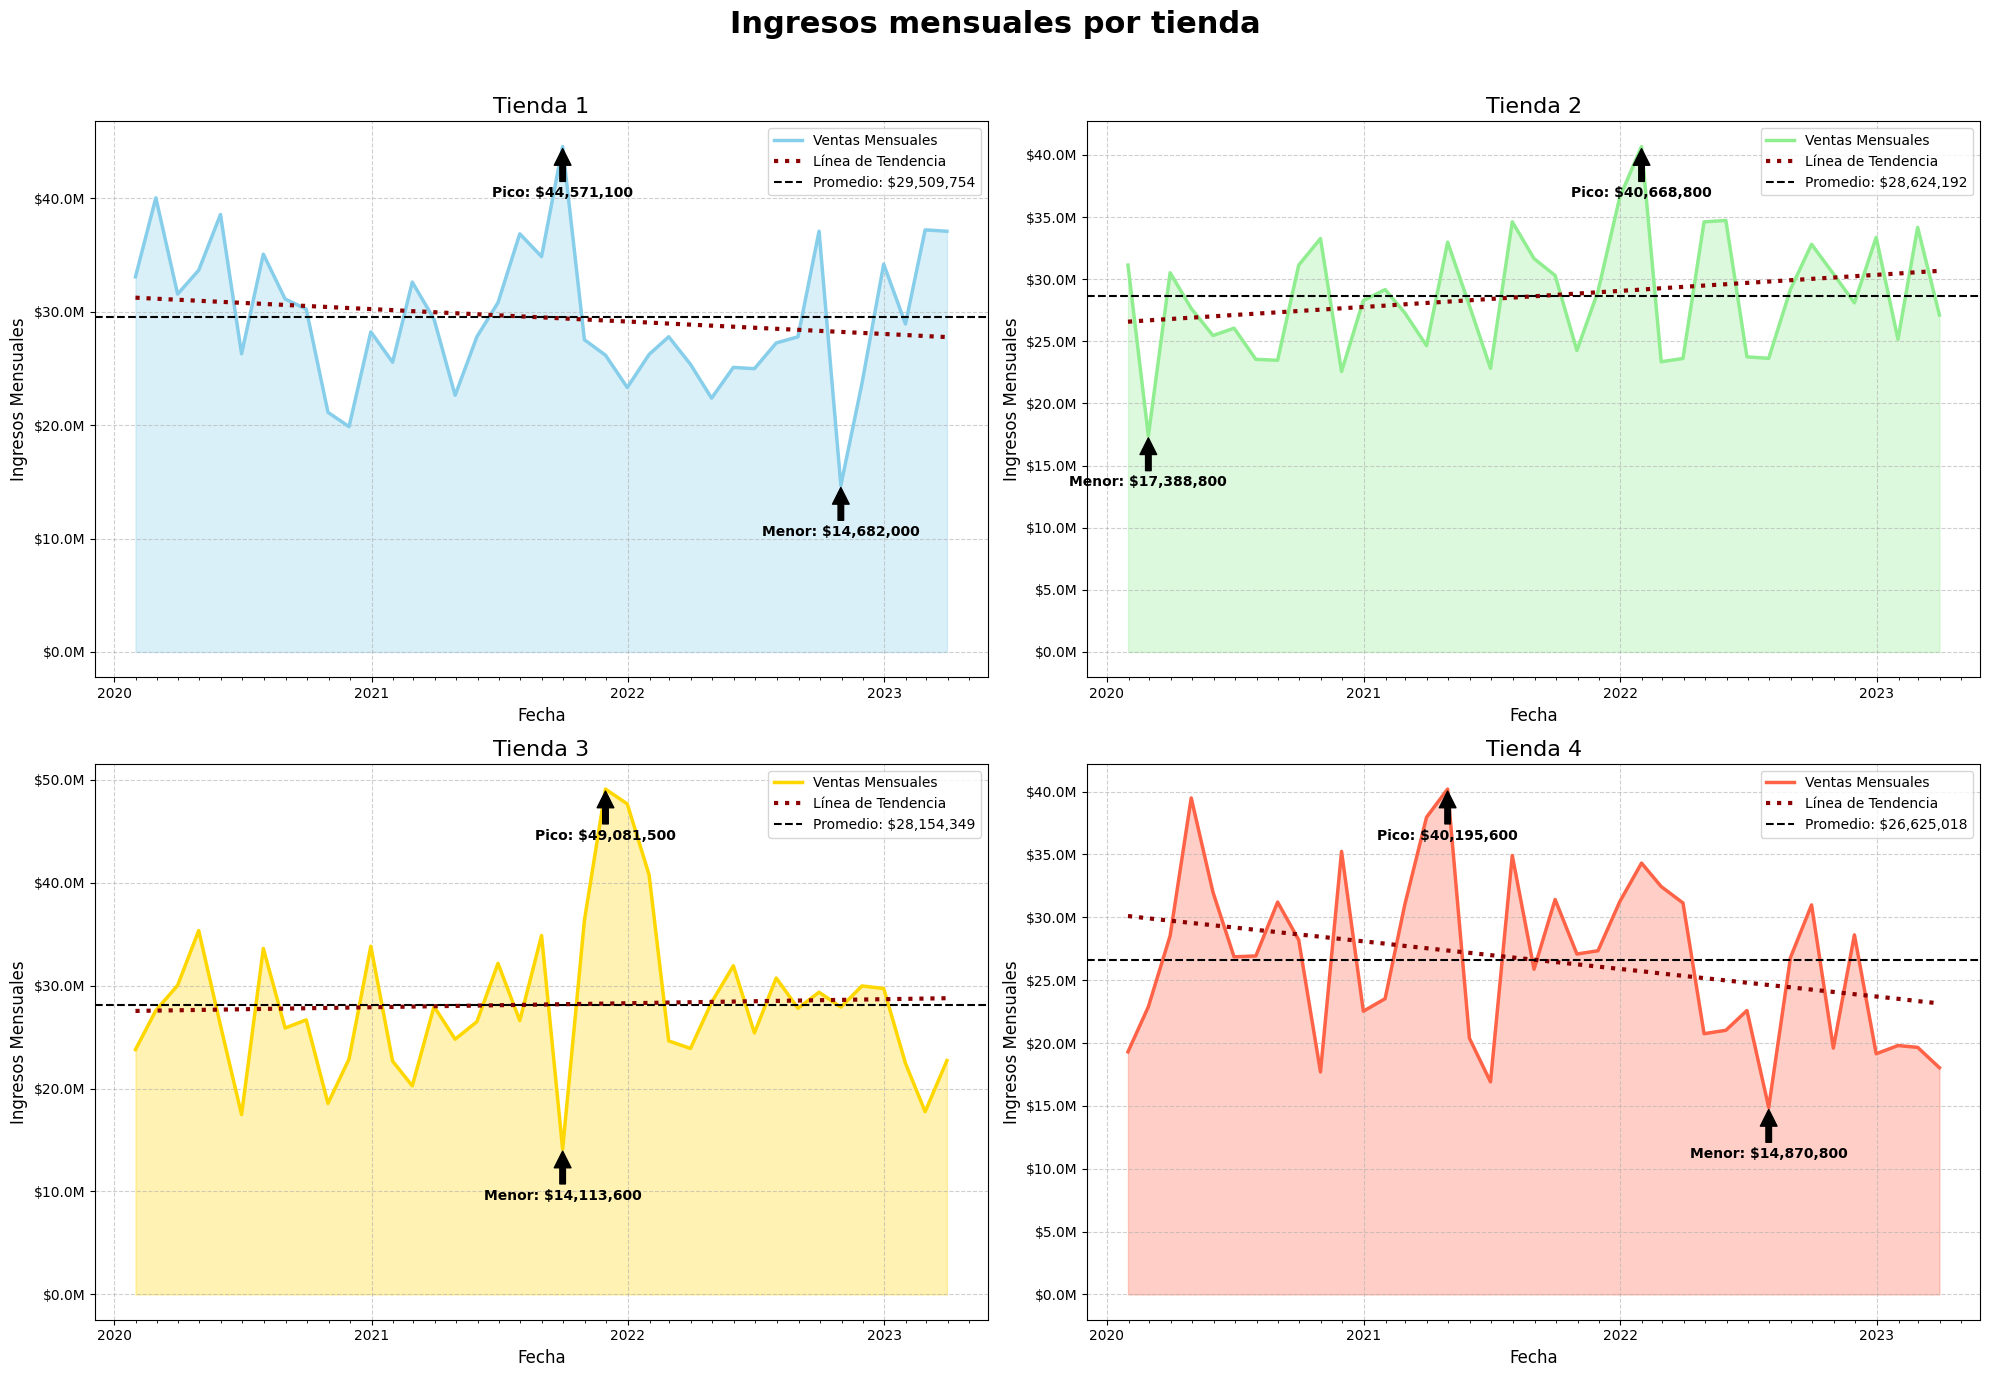

In [ ]:
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import numpy as np # Se importa Numpy para el calculo de tendencia

# Concatenamos nuestros datos de manera que la fecha la tengamos en formato ddmmaaaa y la segmentamos por meses
dfttnd['Fecha de Compra'] = pd.to_datetime(dfttnd['Fecha de Compra'], format='%d/%m/%Y')
vntstndprms = dfttnd.pivot_table(
    index=pd.Grouper(key='Fecha de Compra', freq='ME'),
    columns='Tienda',
    values='Precio',
    aggfunc='sum'
).fillna(0)

# Creamos el gráfico donde incluiremos los cuatro gráficos de area (uno por tienda)
fig, exvntstndprms = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Ingresos mensuales por tienda', fontsize=22, weight='bold')
exvntstndprms_flt = exvntstndprms.flatten()

# Generamos los gráficos de área por cada tienda
for vntstndprms_i, vntstndprms_tnd in enumerate(vntstndprms.columns):
    exvntstndprms_flt_ax = exvntstndprms_flt[vntstndprms_i]
    vntstndprmsprtnd = vntstndprms[vntstndprms_tnd]

    # Características del gráfico de área
    exvntstndprms_flt_ax.fill_between(vntstndprmsprtnd.index, vntstndprmsprtnd.values, color=colores_tiendas[vntstndprms_i], alpha=0.3)
    exvntstndprms_flt_ax.plot(vntstndprmsprtnd.index, vntstndprmsprtnd.values, color=colores_tiendas[vntstndprms_i], linewidth=2.5, label='Ventas Mensuales')

    # Si queremos podemos agregar una línea de tendencia:
    # Convertimos las fechas a números para poder calcular la regresión
    vntstndprmsprtnd_ejex = np.arange(len(vntstndprmsprtnd))
    # Se calculan los coeficientes de la línea de tendencia
    vntstndprmsprtnd_coeftend = np.polyfit(vntstndprmsprtnd_ejex, vntstndprmsprtnd.values, 1) # "1" para que sea una línea recta
    # Creamos la función de la línea de tendencia
    vntstndprmsprtnd_lntnd = np.poly1d(vntstndprmsprtnd_coeftend)
    # Colocamos la línea de tendencia sobre el gráfico
    exvntstndprms_flt_ax.plot(vntstndprmsprtnd.index, vntstndprmsprtnd_lntnd(vntstndprmsprtnd_ejex), color='darkred', linestyle=':', linewidth=3, label='Línea de Tendencia')

    # Agregamos líneas para que sea entendible visualmente
    ## Agregamos una línea continua para visualizar el promedio de ventas
    vntstndprmsprtnd_promedio = vntstndprmsprtnd.mean()
    exvntstndprms_flt_ax.axhline(y=vntstndprmsprtnd_promedio,
                                 color='black',
                                 linestyle='--',
                                 linewidth=1.5,
                                 label=f'Promedio: ${vntstndprmsprtnd_promedio:,.0f}')

    ## Agregamos un marcador para visualizar el máximo de ventas:
    vntstndprmsprtnd_fchvntsmx = vntstndprmsprtnd.idxmax()
    vntstndprmsprtnd_vntsmx = vntstndprmsprtnd.max()
    exvntstndprms_flt_ax.annotate(f'Pico: ${vntstndprmsprtnd_vntsmx:,.0f}',
                xy=(vntstndprmsprtnd_fchvntsmx, vntstndprmsprtnd_vntsmx),
                xytext=(vntstndprmsprtnd_fchvntsmx, vntstndprmsprtnd_vntsmx + vntstndprmsprtnd.max() * -0.1),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center',
                fontweight='bold')

    ## Agregamos un marcador para visualizar el mínimo de ventas:
    vntstndprmsprtnd_fchvntsmn = vntstndprmsprtnd.idxmin()
    vntstndprmsprtnd_vntsmn = vntstndprmsprtnd.min()
    exvntstndprms_flt_ax.annotate(f'Menor: ${vntstndprmsprtnd_vntsmn:,.0f}',
                xy=(vntstndprmsprtnd_fchvntsmn, vntstndprmsprtnd_vntsmn),
                xytext=(vntstndprmsprtnd_fchvntsmn, vntstndprmsprtnd_vntsmn + vntstndprmsprtnd.max() * -0.1),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center',
                fontweight='bold')

    # Le damos formato y personalizamos los subgráficos
    exvntstndprms_flt_ax.set_title(vntstndprms_tnd, fontsize=16)
    exvntstndprms_flt_ax.set_xlabel('Fecha', fontsize=12)
    exvntstndprms_flt_ax.set_ylabel('Ingresos Mensuales', fontsize=12)
    exvntstndprms_flt_ax.legend()
    exvntstndprms_flt_ax.grid(True, linestyle='--', alpha=0.6)

    # Le damos formato y personalizamos los ejes de los subgráficos
    formatter = FuncFormatter(lambda x, _: f'${x/1e6:.1f}M')
    exvntstndprms_flt_ax.yaxis.set_major_formatter(formatter)
    exvntstndprms_flt_ax.xaxis.set_major_locator(mdates.YearLocator())
    exvntstndprms_flt_ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
    exvntstndprms_flt_ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ajustamos y mostramos el gráfico con los subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Reporte de resultados e informe final

## Introducción

El objetivo de este análisis es comparar el rendimiento general de las tiendas 1, 2, 3 y 4 mediante un estudio comparativo realizado con datos históricos de ventas, calificaciones, gastos logísticos y ventas en general. El informe se elaboró ​​en Google Colab con Jupyter Notebooks para integrar el análisis estadístico, la interpretación visual y las conclusiones objetivas en un único entorno interactivo.

## Factores analizados

Se tomaron factores como:

* Los ingresos totales de las tiendas

Al analizar los ingresos totales de las tiendas se puede ver que son bastante similares una de otra; donde se puede apreciar que la tienda 1 encabeza los ingresos, seguida de la tienda 2, tienda 3 y por último la tienda 4 presenta una menor cantidad de ventas.

* Las categorías de productos más y menos vendidas

Observando las categorías de productos más vendidos, se puede apreciar que en todas las tiendas los tres primeros lugares los ocupan "Muebles", "Electrónicos" y "Juguetes". Mientras que a partir del cuarto lugar cambian ligeramente las tendencias. Observamos que los muebles son más vendidos en la Tienda 3.

De estas primeras tres categorías tenemos que el orden de tienda de mayor cantidad de ventas  a menor cantidad es:
Muebles: Tienda 2 > Tienda 4 > Tienda 1 > Tienda 3
Electrónicos: Tienda 3 = Tienda 4 > Tienda 1 > Tienda 2
Juguetes: Tienda 4 > Tienda 1 > Tienda 2 > Tienda 3
Por lo que se podría ver que la tienda 4 encabeza las ventas de estos productos, mientras que la tienda 1 se encuentra en el último puesto.

* Las calificaciones promedio de los clientes por tienda.

Las calificaciones de cada tienda son bastante favorables, ya que el promedio de la mayoría es mayor a 4 de 5 puntos. Incluso podemos observar que las tiendas 2 y 3 son las mejores valuadas, ya que tienen muy pocas calificaciones por debajo de los 3 puntos y su promedio es de 4.04 para la tienda 2 y 4.05 para la tienda 3; mientras que las tiendas 1 y 4 tienen calificaciones bastante parecidas pero bajas ya que el promedio de la tienda 1 es de 3.98 y el de la tienda 4 es de 4.00. Aunque no existe diferencia significativa entre cada una de las tiendas, se pueden categorizar a las tiendas comenzando con la mejor valorada como:

Tienda 3 > Tienda 2 > Tienda 4 > Tienda 1.


* Los productos más y menos vendidos

Por otro lado, observando el producto más vendido por cada tienda, se puede apreciar que el producto estrella de cada una de ellas es diferente, ya que se tiene "Microondas" en la tienda 1, "Iniciando en programación" en la tienda 2, "Kit de bancas" en la tienda 3, "Cama box" en la tienda 4. Mientras que dentro de los productos menos vendidos por cada tienda tenemos a "Celular AXBY" y "Auriculares con micrófono" en la tienda 1, "Juego de mesa" en la tienda 2, "Bloques de construcción" en la tienda 3, "Guitarra eléctrica" en la tienda 4. Lo que podría indicar que las personas vean a la tienda 1 como un lugar idóneo para buscar artículos de línea blanca para el hogar, la tienda 2 como un sitio para encontrar artículos recreativos personales, y las tienda 3 y 4 se aprecien más como sitios idóneos para la búsqueda de muebles o artículos de decoración para el hogar.

* El coste de envío promedio para cada tienda.

Se analizaron los gastos de envío segmentado por tienda para visualizar si existe alguna relación con el desempeño de cada tienda o con la puntuación de la misma. Se segmentaron los datos de los envíos gratuitos (o sin envió a domicilio), para visualizar su cambio ya que generalmente una mayor cantidad de productos o un producto voluminoso podrían suponer un gasto de envió mientras que los artículos personales o que se pueden retirar directamente en tienda al momento de realizar la compra pueden brindar información errónea para el calculo del gasto de envió y esta diferencia es a su vez, un indicador de los artículos más comprados en cada tienda. En general no se observó diferencia significativa entre los gastos de envió considerando envíos gratuitos (o que el cliente haya salido de la tienda con el articulo), y gastos de envió sin considerar los gratuitos (o que el cliente haya salido de la tienda con el articulo); ya que las diferencias entre ambas eran directamente proporcionales al mayor costo de envío por tienda. Teniendo que el orden de los costos por tienda comenzando por el mayor es de:

Tienda 1 > Tienda 2 > Tienda 3 > Tienda 4

Esto supone un gasto para el cliente, lo que puede repercutir en las ventas.

## Conclusión

Tomando en consideración los datos anteriormente mencionados sería prudente comenzar a realizar un "benchmarking" comenzando con la tienda 4, ya que esta tienda tiene los ingresos menores de todas las tiendas y la tendencia de compra va en descenso, mientras que se puede observar que la categoría más vendida son los muebles y se tiene el gasto de envío más bajo, sería una buena opción que esta tienda se enfoque a la venta de muebles.
La tienda 1 tiene menor puntuaciones en cuanto a calificaciones, por lo que se tendría que mejorar el servicio al cliente ya que a pesar de tener mejores ingresos, esta tienda presenta un mayor costo en cuanto a envíos y eso puede ser un impedimento para nuevos clientes y más ventas.
La tienda 2 tiene una tendentica de ventas de productos recreativos o musicales, por lo que puede indicar que existen escuelas de música a su alrededor, por lo que seria buena opción que esta tienda se enfoque a la venta de artículos musicales y muebles relacionados con este rubro.
Por otra parte, la tienda 3 es la que se presenta con un reporte de ingresos constante, y quizá se necesitaría realizar una revisión más profunda a esta tienda si se quiere mejorar las ventas.
